In [166]:
# Import library yang kalian butuhkan
%pip install opencv-python matplotlib numpy pandas scikit-learn scikit-image scipy seaborn --quiet
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Kode di atas merupakan library-library yang berisi fungsi-sungsi untuk mempermudah pengolahan data yang ada agar dapat dilakukan pengklasifikasian darisetiap data. Pertama terdapat `install opencv-python` untuk menginstal library yang dibutuhkan secara langsung di `Jupyter Notebook` atau `Google Colab`. Kemudian ada `os` untuk manajemen file dan direktori, `cv2` untuk pemmrosesan citra, `matplotib.pyplot` dan `seaborn` untuk visualisasi data, `numpy` dan `pandas` untuk manipulasi array dan data, `scikit-learn` untuk machine learning, `skimage.feature` untuk ekstraksi fitur tekstur GLCM, `scipy.stats.entropy` untuk menghitung entropi fitur.

Kode di bawah ini terdapat fungsi `resize_citra` yang di mana agar setiap gambar memiliki ukuran yang sama dan bisa di proses oleh fungsi-fungsi yang lain. Selanjutnya terdapat kode untuk membaca gambar dari folder yang menyimpan data. Selanjutnya di konversi label ke bentuk angka(label encoding) agar bisa digunakan untuk training model machine learning. Dan terakhir kode untuk menampilkan 2 contoh citra dari label berbeda secara berdampingan.

Jumlah data: 200
Jumlah kelas: 2


Text(0.5, 1.0, 'Leaf Blast')

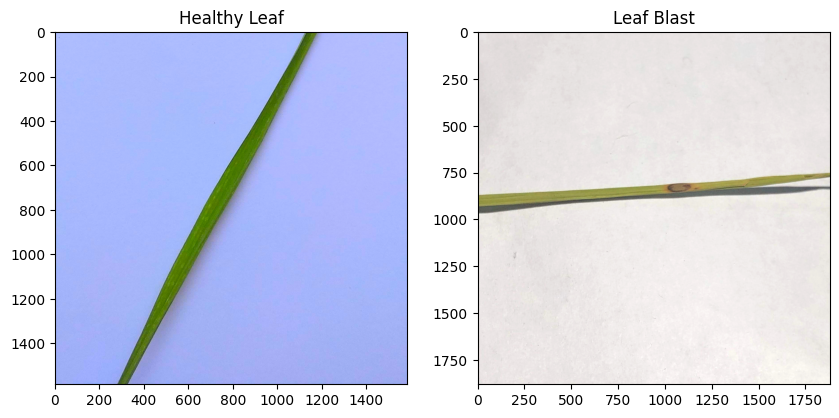

In [167]:
def resize_citra(gambar, ukuran):
    h, w = gambar.shape[:2]
    if gambar.ndim == 3:
        c = gambar.shape[2]
        keluaran = np.zeros((ukuran, ukuran, c), dtype=gambar.dtype)
    else:
        keluaran = np.zeros((ukuran, ukuran), dtype=gambar.dtype)
    for i in range(ukuran):
        for j in range(ukuran):
            src_i = int(i * h / ukuran)
            src_j = int(j * w / ukuran)
            keluaran[i, j] = gambar[src_i, src_j]
    return keluaran

data = []
labels = []
file_name = []
for sub_folder in os.listdir("dataset/"):
    if sub_folder.startswith("."):
        continue

    sub_folder_path = os.path.join("dataset/", sub_folder)
    if os.path.isdir(sub_folder_path):
        sub_folder_files = os.listdir(sub_folder_path)
        for filename in sub_folder_files:
            img_path = os.path.join(sub_folder_path, filename)

            img = plt.imread(img_path)
            resize_img = resize_citra(img, 256)

            data.append(resize_img)
            labels.append(sub_folder)
            name = os.path.splitext(filename)[0]
            file_name.append(filename)
        
data = np.array(data)
labels = np.array(labels)
print("Jumlah data:", len(data))
unique_labels = np.unique(labels)
label_to_index = {label: index for index, label in enumerate(unique_labels)}
labels = np.array([label_to_index[label] for label in labels])
print("Jumlah kelas:", len(unique_labels))

healthy = plt.imread("dataset/healthy/image1.jpg")
leafblast = plt.imread("dataset/leafblast/image1.jpg")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(healthy)
plt.title("Healthy Leaf")

plt.subplot(1, 2, 2)
plt.imshow(leafblast)
plt.title("Leaf Blast")

In [168]:
# melakukan augmentasi data
data_augmented = []
labels_augmented = []
paths_augmented = []
file_name_augmented = []
for i in range(len(data)):
	pass

Kode di atas merupakan kode yang akan digunakan untuk `augmentasi` data. di mana terdapat `data_augmented` untuk menyimoan hasil citra setelah augmentasi, `labels_augmented` untuk label yang sesuai untuk setiap citra augmentasi, `paths_augmented` untuk menyimpan path asal data, serta `file_name_augmented` untuk menyimpan nama file yang sudah di augmentasi.

In [169]:
print("Data sebelum augmentasi: ", len(data))
print("Data setelah augmentasi: ", len(data_augmented))

Data sebelum augmentasi:  200
Data setelah augmentasi:  0


Kode di atas digunakan untuk menampilkan onformasi terkait data sebelum dan sesudah augmentasi.

In [170]:
def ubah_ke_gray(gambar):
    if gambar.ndim == 3:
        return np.dot(gambar[..., :3], [0.2989, 0.5870, 0.1140])
    return gambar

def thresholding(image):
    baris, kolom = image.shape
    hasil = np.zeros((baris, kolom))
    for i in range(baris):
        for j in range(kolom):
            if image[i, j] > 125:
                hasil[i, j] = 255
            else:
                hasil[i, j] = 0
    return hasil

def meanprewitt(gambar):
    def padding5x5(image):
        return np.pad(image, pad_width=2, mode='edge')

    kernel5x5 = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                          [1/25, 1/25, 1/25, 1/25, 1/25],
                          [1/25, 1/25, 1/25, 1/25, 1/25],
                          [1/25, 1/25, 1/25, 1/25, 1/25],
                          [1/25, 1/25, 1/25, 1/25, 1/25]])

    kernelPrewittX = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])

    kernelPrewittY = np.array([[1, 1, 1],
                            [0, 0, 0],
                            [-1, -1, -1]])

    def mean5x5(image, kernel):
        img_pad = padding5x5(image)
        baris, kolom = image.shape
        hasil = np.zeros((baris, kolom))
        for i in range(baris):
            for j in range(kolom):
                temp = 0
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        temp += img_pad[i+k, j+l] * kernel[k, l]
                hasil[i][j] = temp
        return hasil
    
    hasilmean5x5 = mean5x5(gambar, kernel5x5)

    def konvolusi_(image, kernel):
        pad = kernel.shape[0] // 2
        img_pad = np.pad(image, pad_width=pad, mode='constant', constant_values=0)
        baris, kolom = image.shape
        konv = np.zeros((baris, kolom))
        for i in range(baris):
            for j in range(kolom):
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        konv[i, j] += img_pad[i+k, j+l] * kernel[k][l]
        return konv

    def deteksi(image, hasilX, hasilY):
        hasil = np.zeros(image.shape)
        hasil = np.sqrt(abs(pow(hasilX,2)) + abs(pow(hasilY,2)))
        return hasil

    premean5x5Rx = konvolusi_(hasilmean5x5, kernelPrewittX)
    premean5x5Ry = konvolusi_(hasilmean5x5, kernelPrewittY)
    pmean5x5 = deteksi(hasilmean5x5, premean5x5Rx, premean5x5Ry)

    return pmean5x5

def normalisasi(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image)) * 255

Kode di atas merupakan fungsi-fungsi untuk pre-processing terhadap citra masukan, dimana terdapat fungsi `ubah_ke_gray` untuk mengubah citra masukan menjadi graysacle, selanjutnya terdapat fungsi `tresholding` untuk memisahkan objek dengan latar belakang, terdapat fungsi `meanprewitt` untuk mendeteksi tepi dan melihat keutuhan dari objek, serta fungsi `normalisasi` untuk mengubah rentang menjadi `255`.

Kode di bawah ini terdapat fungsi `percobaan` yang digunakan pre-processing untuk setiap citra dimana dalam fungsi ini memanggil fungsi-dungsi sebelumnya untuk pre-processing.

Text(0.5, 1.0, 'Leaf Blast')

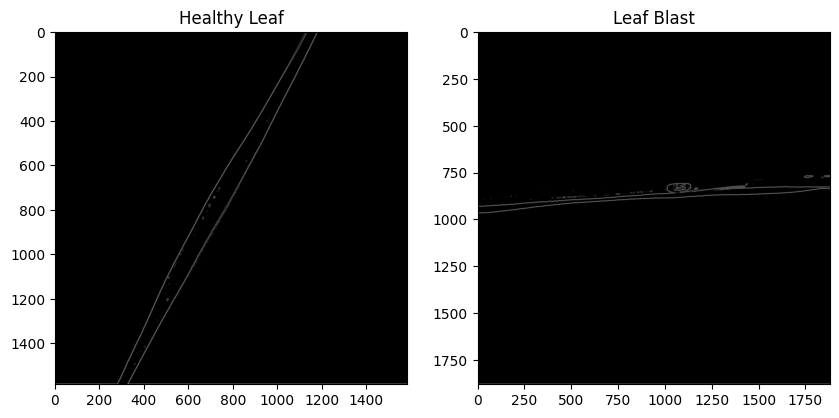

In [171]:
def percobaan(gambar):
	gambar = ubah_ke_gray(gambar)
	gambar = thresholding(gambar)
	gambar = meanprewitt(gambar)
	gambar = normalisasi(gambar).astype(np.uint8)
	return gambar

dataPreprocessed = []
for i in range(len(data)):
	img = data[i]
	img = percobaan(img)
	dataPreprocessed.append(img)

healthyP = percobaan(healthy)
leafblastP = percobaan(leafblast)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(healthyP, cmap='gray')
plt.title('Healthy Leaf')

plt.subplot(1, 2, 2)
plt.imshow(leafblastP, cmap='gray')
plt.title('Leaf Blast')


In [172]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Fungsi `glcm(image, derajat)` digunakan untuk menghitung Gray Level Co-occurrence Matrix (GLCM) dari sebuah citra grayscale berdasarkan arah tertentu. Parameter image adalah array 2 dimensi yang merepresentasikan citra, sedangkan derajat menentukan sudut arah GLCM yang ingin dihitung. Fungsi ini hanya mendukung empat sudut: 0°, 45°, 90°, dan 135°. Berdasarkan sudut tersebut, fungsi akan mengatur parameter angle dalam satuan radian dan memanggil graycomatrix() dari skimage.feature. Hasil dari fungsi ini adalah array 4 dimensi yang merepresentasikan GLCM ter-normalisasi dan simetris dengan jarak antar piksel sebesar 1.

In [173]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

Fungsi `correlation(matriks)` digunakan untuk menghitung nilai korelasi (correlation) dari sebuah matriks GLCM (Gray Level Co-occurrence Matrix). Fungsi ini menerima parameter matriks, yaitu array 4 dimensi hasil dari graycomatrix(), dan mengembalikan nilai korelasi pada indeks [0, 0]. Nilai korelasi ini menggambarkan sejauh mana hubungan linier antara piksel dalam citra, dan merupakan salah satu fitur statistik tekstur yang umum digunakan dalam analisis citra.

In [174]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

Fungsi `dissimilarity(matriks)` digunakan untuk menghitung nilai dissimilarity dari sebuah matriks GLCM (Gray Level Co-occurrence Matrix). Fungsi ini menerima input berupa matriks, yaitu array 4 dimensi hasil dari graycomatrix(), dan mengembalikan nilai dissimilarity pada indeks [0, 0]. Nilai dissimilarity mengukur sejauh mana tingkat ketidaksamaan antara pasangan piksel dalam citra; semakin besar nilai ini, semakin besar pula perbedaan intensitas antar piksel yang berpasangan.

In [175]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

Fungsi homogenity(matriks) digunakan untuk menghitung nilai homogeneity dari sebuah matriks GLCM (Gray Level Co-occurrence Matrix). Parameter matriks merupakan array 4 dimensi hasil dari fungsi graycomatrix(). Fungsi ini mengembalikan nilai homogeneity pada indeks [0, 0], yang merepresentasikan seberapa dekat distribusi elemen-elemen dalam GLCM terhadap diagonal utama. Semakin tinggi nilai homogeneity, semakin halus tekstur citra, karena nilai intensitas piksel yang berdekatan cenderung serupa.

In [176]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

Fungsi `contrast(matriks)` digunakan untuk menghitung nilai contrast dari sebuah matriks GLCM (Gray Level Co-occurrence Matrix). Parameter matriks adalah array 4 dimensi hasil dari fungsi graycomatrix(). Fungsi ini mengembalikan nilai contrast pada indeks [0, 0], yang menunjukkan tingkat perbedaan lokal dalam citra. Nilai contrast yang tinggi mengindikasikan adanya variasi intensitas piksel yang besar, sehingga tekstur citra terlihat lebih kasar.

In [177]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

Fungsi `ASM(matriks)` digunakan untuk menghitung nilai Angular Second Moment (ASM) dari sebuah matriks GLCM (Gray Level Co-occurrence Matrix). Parameter matriks merupakan array 4 dimensi hasil dari fungsi graycomatrix(). Fungsi ini mengembalikan nilai ASM pada indeks [0, 0], yang merepresentasikan tingkat keseragaman energi dalam tekstur citra. Nilai ASM yang tinggi menunjukkan tekstur yang seragam dan halus, karena distribusi nilai intensitas antar pasangan piksel cenderung stabil.

In [178]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

Fungsi `energy(matriks)` digunakan untuk menghitung nilai energy dari sebuah matriks GLCM (Gray Level Co-occurrence Matrix). Parameter matriks adalah array 4 dimensi hasil dari fungsi graycomatrix(). Fungsi ini mengembalikan nilai energy pada indeks [0, 0], yang mencerminkan keseragaman dalam distribusi tekstur citra. Energy merupakan akar kuadrat dari Angular Second Moment (ASM) dan nilainya akan lebih tinggi jika elemen-elemen GLCM terkonsentrasi, menandakan tekstur yang halus dan seragam.

In [179]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Fungsi `entropyGlcm(matriks)` digunakan untuk menghitung nilai entropy dari sebuah matriks GLCM (Gray Level Co-occurrence Matrix). Parameter matriks merupakan array hasil dari fungsi graycomatrix(). Fungsi ini pertama-tama meratakan (ravel) matriks menjadi array satu dimensi, kemudian menghitung entropy menggunakan fungsi entropy dari modul scipy.stats. Nilai entropy mengukur tingkat ketidakpastian atau kompleksitas tekstur dalam citra; nilai entropy yang lebih tinggi menunjukkan tekstur yang lebih kompleks dan acak.

In [180]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode di atas menghitung Gray Level Co-occurrence Matrix (GLCM) untuk setiap citra yang sudah dipreproses pada empat sudut yaitu `0°`, `45°`, `90°`, dan `135°`. Untuk setiap citra, fungsi `glcm()` dipanggil dengan parameter sudut yang berbeda-beda dan hasilnya disimpan dalam daftar terpisah sesuai dengan sudutnya, yaitu `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135`. Dengan demikian, setiap citra memiliki empat matriks GLCM yang merepresentasikan tekstur berdasarkan arah yang berbeda, yang nantinya dapat digunakan untuk ekstraksi fitur tekstur lebih lanjut.

In [181]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

Variabel-variabel di atas adalah daftar kosong yang disiapkan untuk menyimpan hasil ekstraksi berbagai fitur tekstur dari matriks GLCM pada empat sudut berbeda: 0°, 45°, 90°, dan 135°. Setiap fitur seperti kontras, dissimilarity, homogenitas, entropi, ASM, energy, dan korelasi akan dihitung dari matriks GLCM pada masing-masing sudut dan hasilnya akan disimpan ke dalam daftar yang sesuai dengan sudut dan jenis fiturnya. Dengan cara ini, data fitur tekstur yang lengkap dan terorganisir dapat digunakan untuk analisis atau klasifikasi lebih lanjut.

In [182]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

Kode di atas melakukan ekstraksi fitur korelasi dari matriks GLCM untuk setiap citra pada empat sudut yaitu 0°, 45°, 90°, dan 135°. Untuk setiap citra, fungsi correlation() dipanggil pada matriks GLCM yang sesuai dengan sudutnya, kemudian hasil nilai korelasi tersebut disimpan secara berurutan ke dalam daftar correlation0, correlation45, correlation90, dan correlation135. Dengan demikian, kode ini mengumpulkan fitur korelasi tekstur untuk seluruh dataset berdasarkan arah yang berbeda.

In [183]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

Kode di atas menghitung fitur kontras dari matriks GLCM untuk setiap citra dalam dataset pada empat sudut yaitu 0°, 45°, 90°, dan 135°. Untuk setiap citra, fungsi contrast() dipanggil pada matriks GLCM yang sesuai dengan sudutnya, lalu hasil nilai kontras tersebut disimpan secara berurutan ke dalam daftar Kontras0, Kontras45, Kontras90, dan Kontras135. Dengan demikian, kode ini mengumpulkan fitur kontras tekstur untuk seluruh citra berdasarkan arah yang berbeda.

In [184]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

Kode di atas melakukan ekstraksi fitur dissimilarity dari matriks GLCM untuk setiap citra dalam dataset pada empat sudut yaitu 0°, 45°, 90°, dan 135°. Untuk setiap citra, fungsi dissimilarity() dipanggil pada matriks GLCM yang sesuai dengan sudutnya, kemudian hasil nilai dissimilarity tersebut disimpan secara berurutan ke dalam daftar dissimilarity0, dissimilarity45, dissimilarity90, dan dissimilarity135. Dengan cara ini, fitur dissimilarity tekstur dikumpulkan untuk seluruh citra berdasarkan arah yang berbeda.

In [185]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

Kode di atas melakukan ekstraksi fitur homogenitas dari matriks GLCM untuk setiap citra dalam dataset pada empat sudut yaitu 0°, 45°, 90°, dan 135°. Untuk setiap citra, fungsi homogenity() dipanggil pada matriks GLCM yang sesuai dengan sudutnya, lalu hasil nilai homogenitas tersebut disimpan secara berurutan ke dalam daftar homogenity0, homogenity45, homogenity90, dan homogenity135. Dengan demikian, fitur homogenitas tekstur berhasil dikumpulkan untuk seluruh citra berdasarkan arah yang berbeda.

In [186]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

Kode di atas menghitung fitur entropi dari matriks GLCM untuk setiap citra dalam dataset pada empat sudut yaitu 0°, 45°, 90°, dan 135°. Untuk setiap citra, fungsi entropyGlcm() dipanggil pada matriks GLCM yang sesuai dengan sudutnya, kemudian hasil nilai entropi tersebut disimpan secara berurutan ke dalam daftar entropy0, entropy45, entropy90, dan entropy135. Dengan cara ini, fitur entropi tekstur yang merefleksikan kompleksitas citra dikumpulkan berdasarkan arah yang berbeda.

In [187]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

Kode di atas menghitung fitur Angular Second Moment (ASM) dari matriks GLCM untuk setiap citra dalam dataset pada empat sudut yaitu 0°, 45°, 90°, dan 135°. Untuk setiap citra, fungsi ASM() dipanggil pada matriks GLCM yang sesuai dengan sudutnya, kemudian hasil nilai ASM tersebut disimpan secara berurutan ke dalam daftar ASM0, ASM45, ASM90, dan ASM135. Dengan demikian, fitur ASM yang mencerminkan keseragaman tekstur citra dikumpulkan berdasarkan arah yang berbeda.

In [188]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

Kode di atas menghitung fitur energy dari matriks GLCM untuk setiap citra dalam dataset pada empat sudut yaitu 0°, 45°, 90°, dan 135°. Untuk setiap citra, fungsi energy() dipanggil pada matriks GLCM yang sesuai dengan sudutnya, kemudian hasil nilai energy tersebut disimpan secara berurutan ke dalam daftar energy0, energy45, energy90, dan energy135. Dengan cara ini, fitur energy tekstur yang mencerminkan keseragaman energi citra dikumpulkan berdasarkan arah yang berbeda.

Kode di bawah menggabungkan semua fitur tekstur yang telah diekstraksi bersama dengan nama file dan label ke dalam sebuah dictionary dataTable. Dictionary ini kemudian diubah menjadi sebuah DataFrame pandas dengan pd.DataFrame(dataTable). DataFrame tersebut kemudian disimpan ke file CSV bernama 'hasil_ekstraksi_1.csv' tanpa menyertakan indeks. Setelah itu, file CSV yang baru saja disimpan dibaca kembali menggunakan pd.read_csv() dan hasilnya ditampilkan. Dengan cara ini, seluruh data fitur tekstur dan informasi terkait disimpan secara terstruktur dan siap untuk analisis atau proses selanjutnya.

In [189]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_1.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_1.csv')
hasilEkstrak

,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,image1.jpg,0,559.256893,1107.039323,497.695282,1002.595648,0.915519,0.904595,0.921067,0.915304,...,0.824592,0.824002,0.904790,0.901308,0.908070,0.907745,0.741099,0.349997,0.771379,0.411321
1,image10.jpg,0,474.243428,978.247459,555.116544,1075.928904,0.904105,0.896945,0.898556,0.884581,...,0.780021,0.771927,0.886364,0.884447,0.883188,0.878594,0.777209,0.409055,0.734239,0.350047
2,image100.jpg,0,483.664691,1011.492272,555.493352,1063.371888,0.917981,0.903894,0.911055,0.898352,...,0.801357,0.797927,0.898682,0.895990,0.895186,0.893267,0.761369,0.348030,0.722852,0.314590
3,image11.jpg,0,452.715839,1053.386052,569.603738,986.255686,0.885726,0.859116,0.877654,0.865964,...,0.725650,0.724130,0.856643,0.847527,0.851851,0.850958,0.783842,0.350761,0.720800,0.392136
4,image12.jpg,0,495.773483,984.805060,552.666881,1105.080185,0.903749,0.914134,0.900660,0.888796,...,0.791405,0.783862,0.891297,0.892648,0.889610,0.885360,0.774142,0.428554,0.744890,0.358763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,image95.jpg,1,557.138205,1009.831895,492.948851,1083.299393,0.933262,0.928529,0.938258,0.922378,...,0.856994,0.847138,0.922581,0.924611,0.925740,0.920401,0.713226,0.318021,0.748483,0.268406
196,image96.jpg,1,541.654412,1014.500746,505.498483,1071.449058,0.946121,0.941630,0.949958,0.936705,...,0.880050,0.873029,0.936316,0.937727,0.938110,0.934360,0.700537,0.238532,0.721620,0.195788
197,image97.jpg,1,537.740472,1015.258131,505.304259,1063.111357,0.951230,0.946685,0.955263,0.942344,...,0.890105,0.883545,0.941721,0.943000,0.943454,0.939971,0.695397,0.210689,0.714719,0.173485
198,image98.jpg,1,556.828278,1012.420238,499.233640,1088.985590,0.931843,0.927814,0.936616,0.921919,...,0.854266,0.846000,0.921780,0.923532,0.924265,0.919783,0.710893,0.306612,0.742594,0.254174


Kode di bawah melakukan seleksi fitur dengan menghapus fitur yang memiliki korelasi sangat tinggi (≥ 0.95) satu sama lain, kemudian menampilkan heatmap korelasi fitur terpilih untuk memudahkan analisis hubungan antar fitur.

<Axes: >

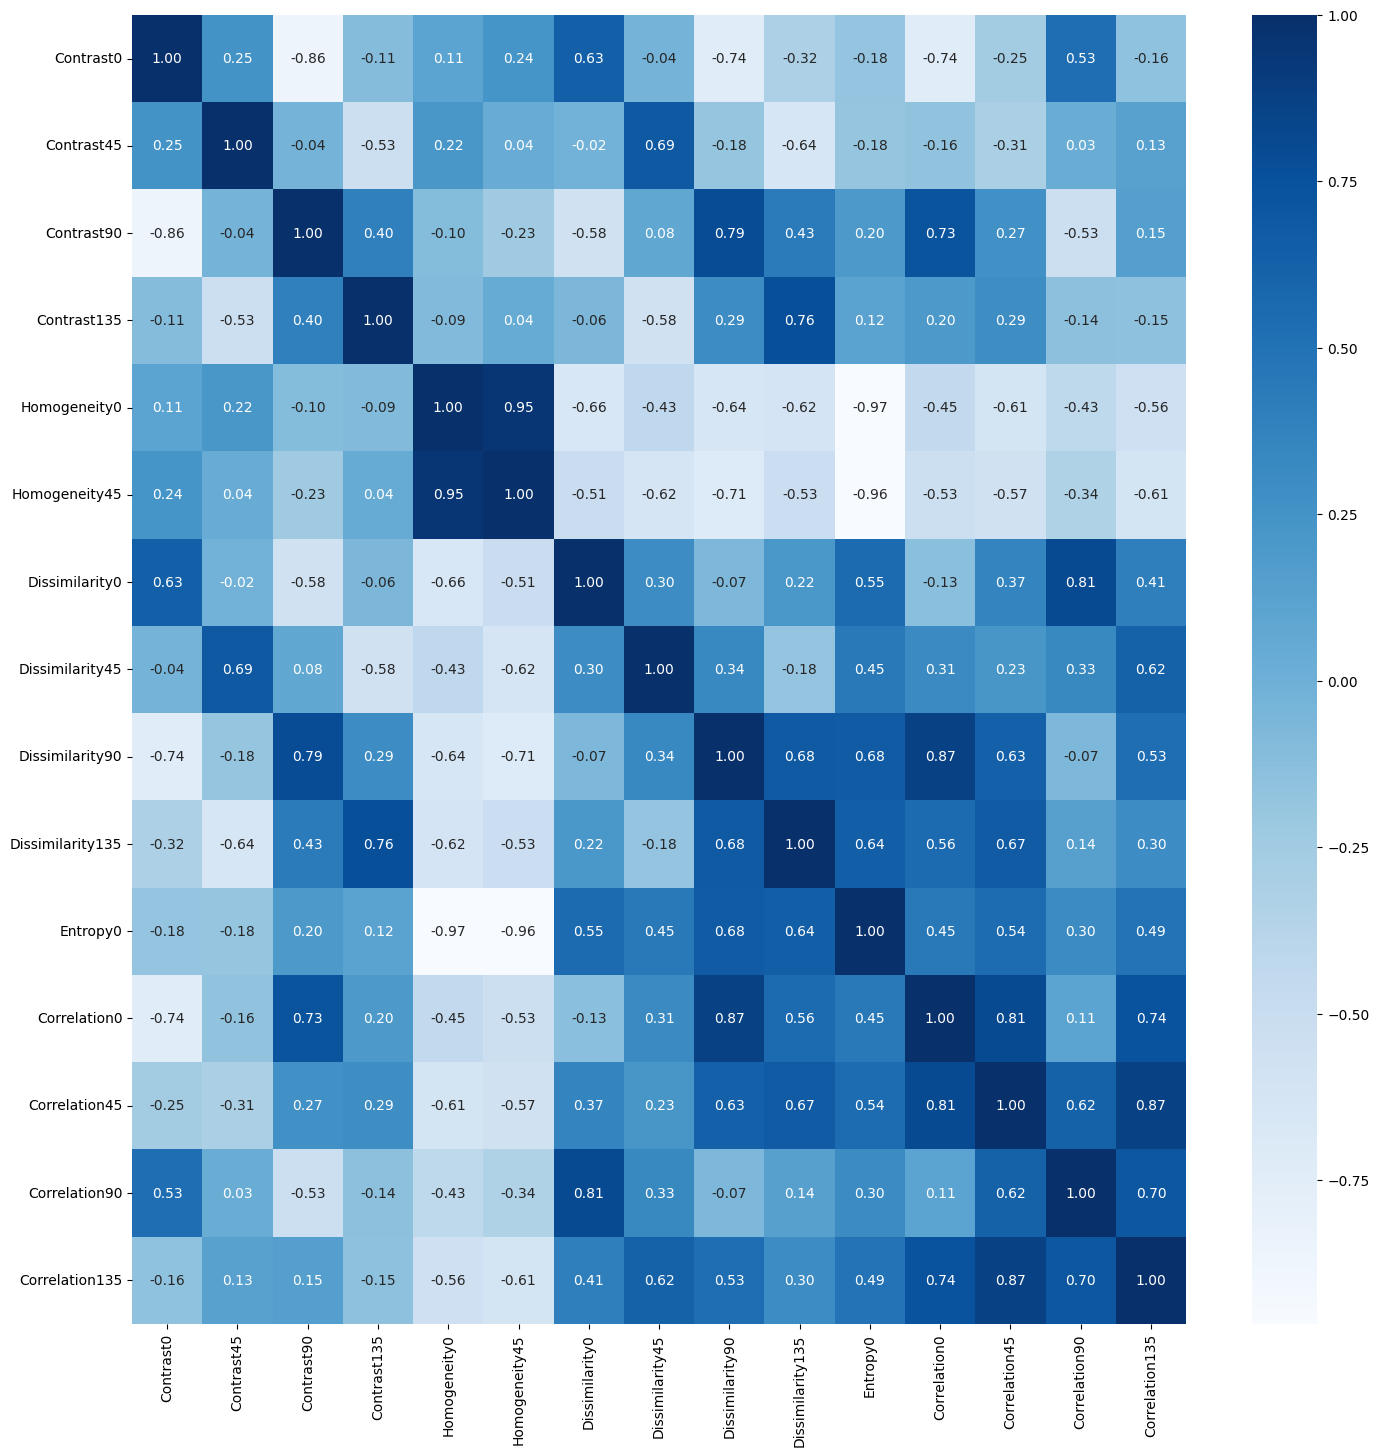

In [190]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

In [191]:
# ubah bagian test_size sesuai kebutuhan
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 15)
(40, 15)


Kode di atas membagi dataset fitur (x_new) dan label (y) menjadi data latih dan data uji dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian, menggunakan train_test_split dengan parameter test_size=0.2 dan random_state=42 untuk hasil yang dapat direproduksi, kemudian mencetak ukuran masing-masing subset data hasil pembagian tersebut.

In [192]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

Kode ini melakukan normalisasi fitur pada data latih dan data uji dengan metode standarisasi, yaitu mengurangi nilai rata-rata (mean) dan membagi dengan standar deviasi (std) dari data latih (X_train), sehingga kedua dataset memiliki distribusi dengan mean 0 dan standar deviasi 1, yang membantu meningkatkan performa model machine learning.

In [193]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

Kode di atas mendefinisikan fungsi generateClassificationReport yang menampilkan laporan klasifikasi lengkap termasuk precision, recall, f1-score, confusion matrix, dan akurasi berdasarkan label asli dan prediksi. Selain itu, kode juga menginisialisasi tiga model klasifikasi yang berbeda: Random Forest dengan 5 pohon keputusan, Support Vector Machine dengan kernel RBF, dan K-Nearest Neighbors dengan 5 tetangga terdekat, semuanya menggunakan seed random 42 untuk konsistensi hasil.

Kode di bawah melatih model Random Forest menggunakan data latih X_train dan y_train. Setelah pelatihan selesai, model digunakan untuk memprediksi kelas pada data latih dan hasilnya dievaluasi dengan menampilkan laporan klasifikasi, confusion matrix, dan akurasi. Selanjutnya, model juga digunakan untuk memprediksi kelas pada data uji X_test dan evaluasi serupa dilakukan untuk mengukur performa model pada data yang belum pernah dilihat sebelumnya.

In [194]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.99      0.96      0.97        81

    accuracy                           0.97       160
   macro avg       0.98      0.98      0.97       160
weighted avg       0.98      0.97      0.97       160

[[78  1]
 [ 3 78]]
Accuracy: 0.975

------Testing Set------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.83      0.79      0.81        19

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40

[[18  3]
 [ 4 15]]
Accuracy: 0.825


Kode di bawah melatih model Support Vector Machine (SVM) menggunakan data latih X_train dan y_train. Setelah pelatihan, model digunakan untuk memprediksi kelas pada data latih dan hasilnya dievaluasi dengan laporan klasifikasi, confusion matrix, dan akurasi. Kemudian, model juga memprediksi kelas pada data uji X_test dan dilakukan evaluasi yang sama untuk mengukur kinerja model pada data baru.

In [195]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        79
           1       0.96      0.86      0.91        81

    accuracy                           0.91       160
   macro avg       0.92      0.91      0.91       160
weighted avg       0.92      0.91      0.91       160

[[76  3]
 [11 70]]
Accuracy: 0.9125

------Testing Set------
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.78      0.95      0.86        19

    accuracy                           0.85        40
   macro avg       0.86      0.85      0.85        40
weighted avg       0.87      0.85      0.85        40

[[16  5]
 [ 1 18]]
Accuracy: 0.85


Kode di bawah melatih model K-Nearest Neighbors (KNN) dengan data latih X_train dan y_train. Setelah model terlatih, prediksi dilakukan pada data latih dan hasilnya dievaluasi menggunakan laporan klasifikasi, confusion matrix, dan akurasi. Selanjutnya, prediksi juga dilakukan pada data uji X_test dan evaluasi serupa dijalankan untuk menilai performa model pada data yang belum pernah dilihat.

In [196]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        79
           1       0.95      0.85      0.90        81

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160

[[75  4]
 [12 69]]
Accuracy: 0.9

------Testing Set------
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.73      0.84      0.78        19

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40

[[15  6]
 [ 3 16]]
Accuracy: 0.775


Kode di bawah mendefinisikan fungsi plot_confusion_matrix untuk menampilkan matriks kebingungan (confusion matrix) dengan visualisasi menggunakan ConfusionMatrixDisplay dari scikit-learn, yang diberi judul sesuai parameter. Setelah itu, fungsi tersebut dipanggil untuk menampilkan confusion matrix dari hasil prediksi data uji (y_test) oleh ketiga model klasifikasi: Random Forest, SVM, dan KNN, sehingga memudahkan perbandingan performa visual antar model.

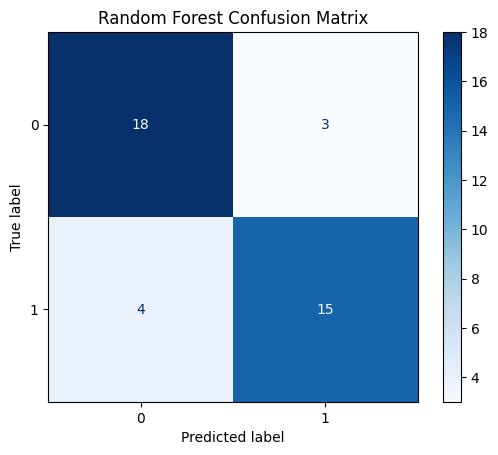

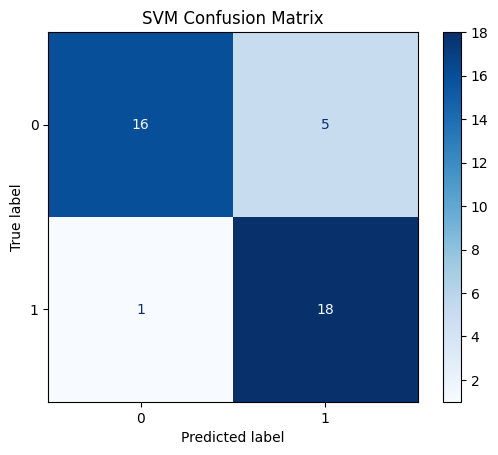

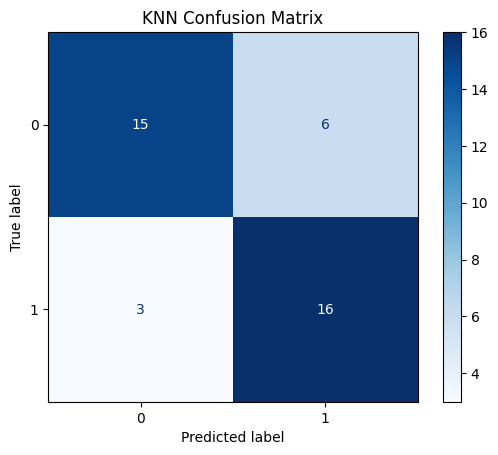

In [197]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")